In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
print(diabetes_data.describe())
print(diabetes_data.shape)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
print(diabetes_data.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


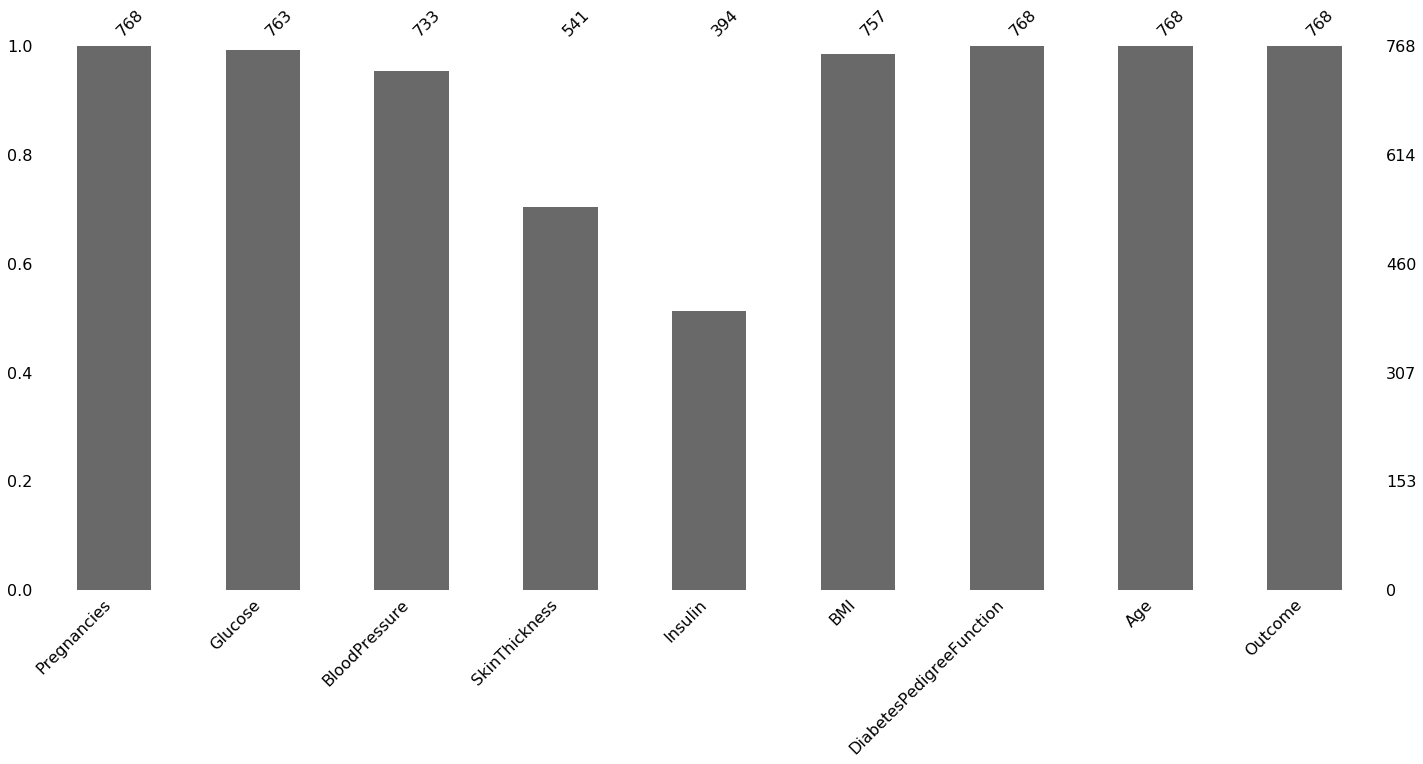

In [5]:
colume = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

diabetes_data[colume] = diabetes_data[colume].replace(0,np.nan)
import missingno as msno

p=msno.bar(diabetes_data)

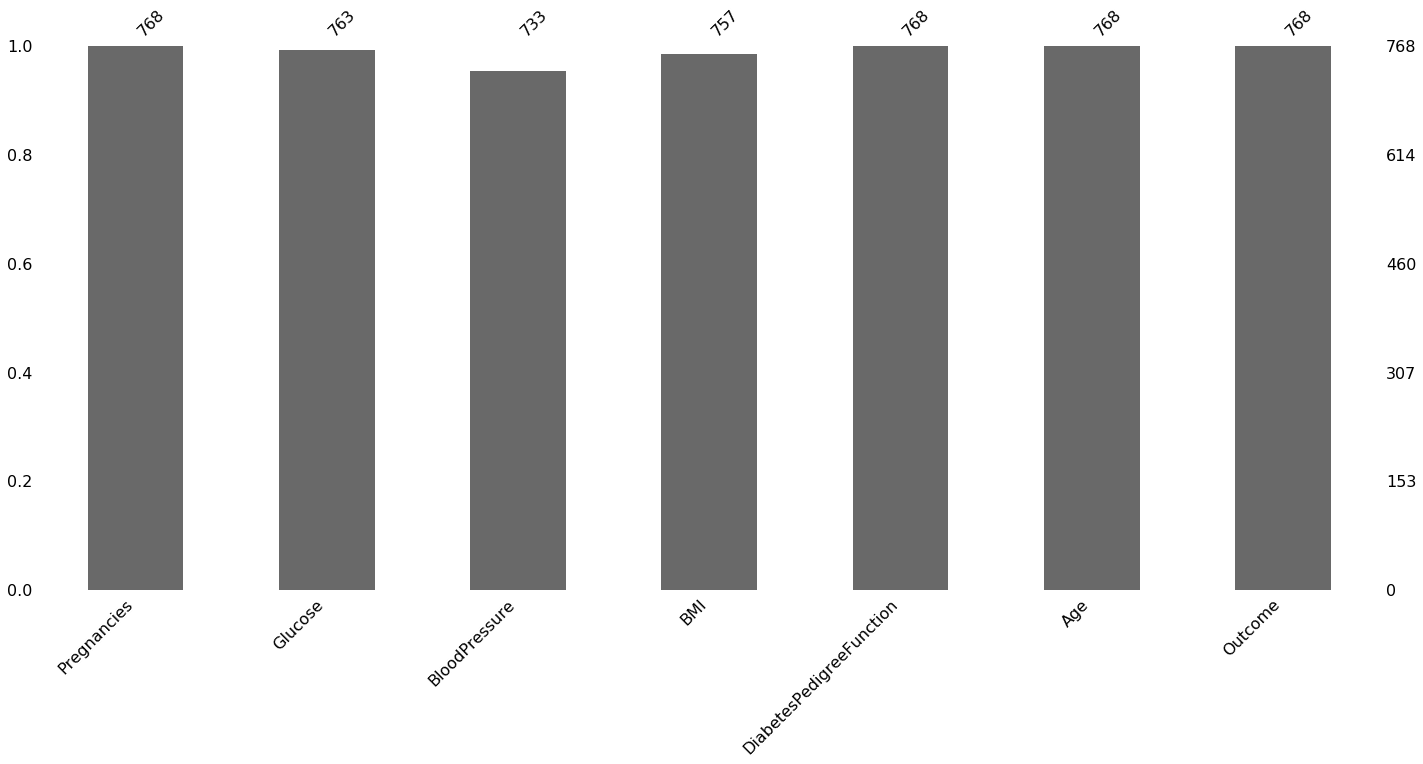

In [6]:
thresh_count = diabetes_data.shape[0]*0.8
diabetes_data = diabetes_data.dropna(thresh=thresh_count, axis=1)

p=msno.bar(diabetes_data)

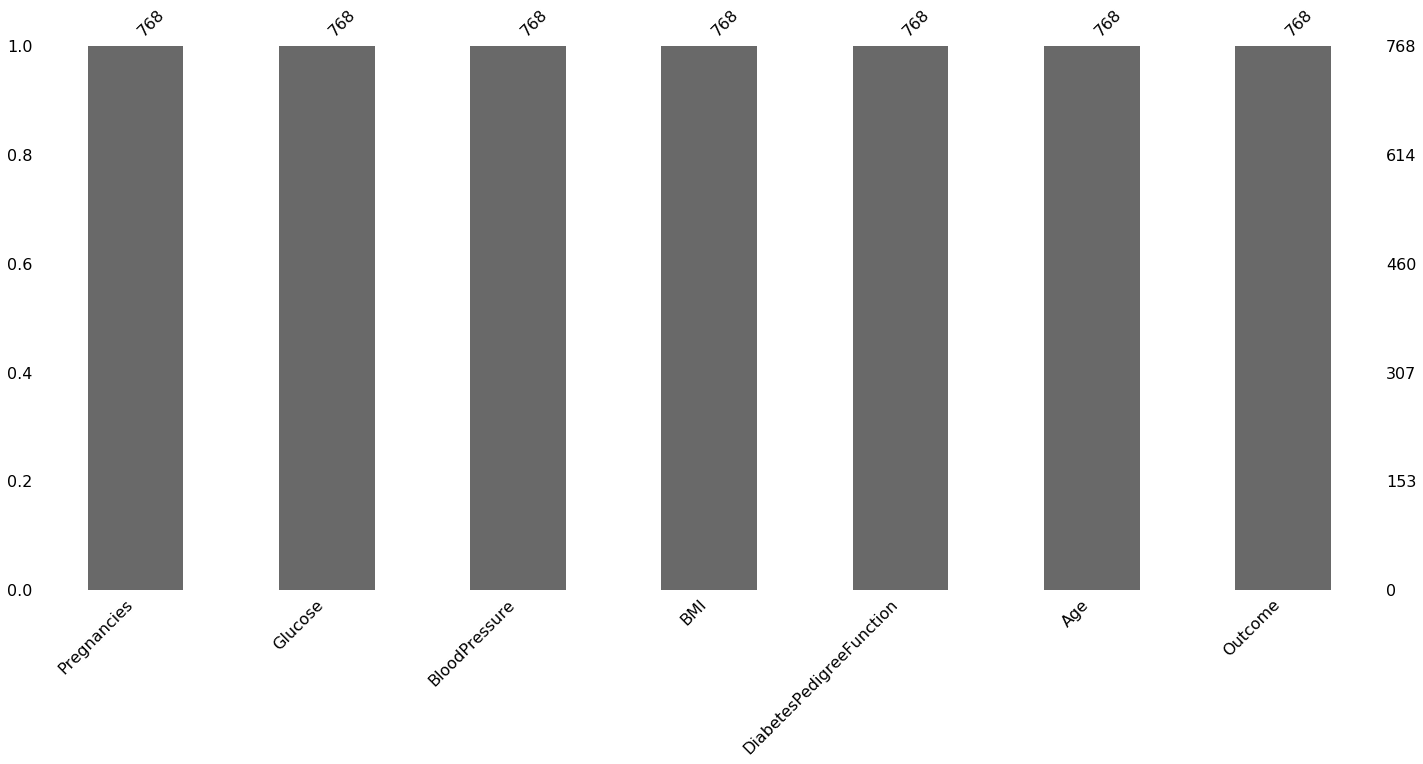

In [7]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(strategy='mean')

colume=['Glucose', 'BloodPressure', 'BMI']
diabetes_data[colume] = imr.fit_transform(diabetes_data[colume])

p=msno.bar(diabetes_data)

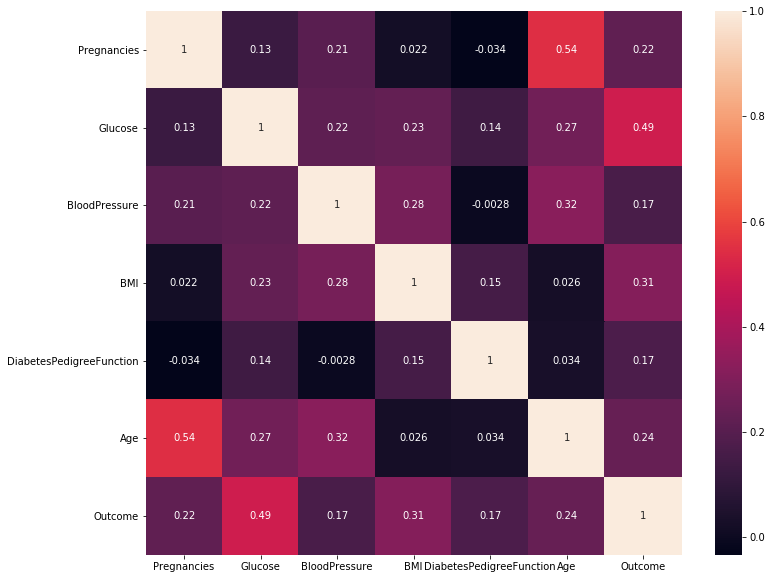

In [8]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(diabetes_data.corr(), annot=True)

In [9]:
x = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y)

print(x_train.shape,x_test.shape)

(537, 6) (231, 6)


<class 'numpy.ndarray'>


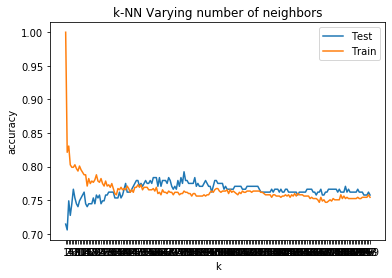

test accurate: 0.7635009310986964
test accurate: 0.7922077922077922


In [19]:
# 导入KNN算法

from sklearn.neighbors import KNeighborsClassifier

# 保存不同k值测试集准确率

test_scores = []

# 保存不同k值训练集准确率

train_scores = []

x_train_values = x_train.values
print(type(x_train_values))
y_train_values = y_train.values

# 设置30个k值

k = 200

for i in range(1,k):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    # 保存测试集准确率
    test_scores.append(knn.score(x_test,y_test))
    # 保存训练集准确率
    train_scores.append(knn.score(x_train,y_train))
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,k),test_scores,label="Test")
plt.plot(range(1,k),train_scores,label="Train")
plt.legend()
plt.xticks(range(1,k))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()
k = np.argmax(test_scores)+1
knn = KNeighborsClassifier(k)

knn.fit(x_train,y_train)
print("test accurate:",knn.score(x_train,y_train))
print("test accurate:",knn.score(x_test,y_test))


In [11]:
#朴素贝叶斯
from sklearn import naive_bayes
clf=naive_bayes.GaussianNB()
clf.fit(x_train,y_train)
print("test accurate:"+ str(clf.score(x_train,y_train)))
print("test accurate:"+ str(clf.score(x_test,y_test)))

test accurate:0.7523277467411545
test accurate:0.7835497835497836


In [12]:
x_train_1=x_train.values[y_train.values==1,:]
x_train_0=x_train.values[y_train.values==0,:]
u1=x_train_1.mean(0)
u0=x_train_0.mean(0)
u=x_train_values.mean(0)

N0=x_train_0.shape[0]
N1=x_train_1.shape[0]
cov_0=np.cov(x_train_0.T)

cov_1=np.cov(x_train_1.T)
u1=u1[:,np.newaxis]
u0=u0[:,np.newaxis]
u=u[:,np.newaxis]
Sw=N0*cov_0+N1*cov_1
w=np.dot(np.linalg.inv(Sw),(u0-u1))
#print(w.T.shape)
w0=-(np.dot(w.T,u))
print(w0)
pred=np.dot(w.T,x_test.values.T)+w0
pred=pred.T
print(pred.shape)

[[0.0162954]]
(231, 1)


In [13]:
for i,val in enumerate(list(pred)):
    if val>0:
        pred[i,0]=0
    else:
        pred[i,0]=1
truth=y_test.values
truth=truth[:,np.newaxis]
sum=0
for i in range(truth.shape[0]):
    if pred[i,0]==truth[i,0]:
        sum+=1
#print(sum)
accurate=sum/truth.shape[0]
print('test accurate:'+str(accurate))
pred=np.dot(w.T,x_train.values.T)+w0
pred=pred.T
for i,val in enumerate(list(pred)):
    if val>0:
        pred[i,0]=0
    else:
        pred[i,0]=1
truth=y_train.values
truth=truth[:,np.newaxis]
sum=0
for i in range(truth.shape[0]):
    if pred[i,0]==truth[i,0]:
        sum+=1
#print(sum)
accurate=sum/truth.shape[0]
print('train accurate:'+str(accurate))

test accurate:0.7489177489177489
train accurate:0.7486033519553073


In [14]:
from sklearn import svm
clf=svm.SVC(kernel='rbf', decision_function_shape='ovr')
clf.fit(X=x_train, y=y_train,sample_weight=None)
print("train accurate:",clf.score(x_train, y_train))  # 精度
print("test accurate:",clf.score(x_test, y_test))  # 精度
#y_hat = clf.predict(x_train)
#print(y_hat)
#result = clf.predict(x_test)
#print(y_test)
#print(result)

train accurate: 0.7653631284916201
test accurate: 0.7662337662337663


In [15]:
print("==========================================")      
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
print("LR")
print("train accurate:",clf.score(x_train,y_train))
#print(classification_report(y_test,predictions))
print("test accurate:",clf.score(x_test, y_test))

LR
train accurate: 0.7579143389199255
test accurate: 0.7965367965367965


In [16]:
### Linear Discriminant Analysis
print("==========================================")   
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
print("AC",clf.score(x_train,y_train))
#print(classification_report(y_test,predictions))
print("AC",clf.score(x_test, y_test))

AC 0.7560521415270018
AC 0.7965367965367965


In [17]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd',activation = 'relu',max_iter = 1000,alpha = 1e-4,hidden_layer_sizes = (100,100,100),random_state = 1,verbose = True)
mlp.fit(x_train.values,y_train.values)   
print(mlp.n_layers_)
print(mlp.n_iter_)
print(mlp.loss_)
#print(mlp.out_activation_)
print(mlp.score(x_train,y_train))
print(mlp.score(x_test,y_test))

Iteration 1, loss = 3.87928857
Iteration 2, loss = 2.34089204
Iteration 3, loss = 1.09087079
Iteration 4, loss = 1.14893548
Iteration 5, loss = 0.64142169
Iteration 6, loss = 0.61217575
Iteration 7, loss = 0.59674268
Iteration 8, loss = 0.60100898
Iteration 9, loss = 0.62235047
Iteration 10, loss = 0.60599979
Iteration 11, loss = 0.59551198
Iteration 12, loss = 0.59381146
Iteration 13, loss = 0.58191542
Iteration 14, loss = 0.57814661
Iteration 15, loss = 0.58549526
Iteration 16, loss = 0.57314329
Iteration 17, loss = 0.57145059
Iteration 18, loss = 0.57523806
Iteration 19, loss = 0.57122976
Iteration 20, loss = 0.57108194
Iteration 21, loss = 0.56931519
Iteration 22, loss = 0.57675676
Iteration 23, loss = 0.57175130
Iteration 24, loss = 0.56883363
Iteration 25, loss = 0.58055815
Iteration 26, loss = 0.56864232
Iteration 27, loss = 0.56587794
Iteration 28, loss = 0.57314548
Iteration 29, loss = 0.57617012
Iteration 30, loss = 0.57337133
Iteration 31, loss = 0.57690058
Iteration 32, los